In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [2]:
path = "./FIELDmp3/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [3]:
# Example parameters for BirdNET
#isolation_parameters = {
#    "model" : "birdnet",
#    "output_path" : "outputs",
#    "lat" : 35.4244,
#    "lon" : -120.7463,
#    "week" : 18,
#    "min_conf" : 0.5,
#    "filetype" : "wav", 
#    "num_predictions" : 1,
#    "write_to_csv" : False
#}

# Example Parameters for Microfaune
isolation_parameters = {
     "model" : "microfaune",
     "technique" : "steinberg",
     "threshold_type" : "median",
     "threshold_const" : 2.0,
     "threshold_min" : 0.0,
     "window_size" : 2.0,
     "chunk_size" : 5.0
}

# Example parameters for TweetyNET
# isolation_parameters = {
#     "model" : "tweetynet",
#     "tweety_output": True,
#    "technique" : "steinberg",
#     "threshold_type" : "median",
#     "threshold_const" : 2.0,
#     "threshold_min" : 0.0,
#     "window_size" : 2.0,
#     "chunk_size" : 5.0
# }

### Pandas Ouput of Automated Labeling 

In [4]:
automated_df = generate_automated_labels(path,isolation_parameters)

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[120.90661 454.33752 385.19772 ... 411.95566 347.67853 377.93335] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[-108.63889  -182.21236   -70.979805 ...  401.2657    388.59613
  412.17178 ] as keyword args. From version 0.10 passing these as positional arguments will res

Failed to load .DS_Store


/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[-313.64008  -691.6653   -799.9421   ...   81.009125   94.24985
  222.8164  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/IsoAutio.py:852: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotations = annotations.append(new_entry)
/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalcha

### Function that gathers statistics about the duration of annotations

In [5]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,1360,2.02,5.738632,7.381232,1.0,2.046395,2.811905,5.804354,60.0


### Function that converts annotations into 3 second chunks

In [6]:
annotation_chunker(automated_df, 3)

,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,20210816_054000.mp3,60.0,0,0.0,3.0,44100,bird
1,20210816_054000.mp3,60.0,0,3.0,3.0,44100,bird
2,20210816_054000.mp3,60.0,0,6.0,3.0,44100,bird
3,20210816_054000.mp3,60.0,0,9.0,3.0,44100,bird
4,20210816_054000.mp3,60.0,0,12.0,3.0,44100,bird
...,...,...,...,...,...,...,...
3396,20210812_050000.mp3,60.0,0,45.0,3.0,44100,bird
3397,20210812_050000.mp3,60.0,0,48.0,3.0,44100,bird
3398,20210812_050000.mp3,60.0,0,51.0,3.0,44100,bird
3399,20210812_050000.mp3,60.0,0,54.0,3.0,44100,bird


### Human Manual Labels for Comparison 

In [7]:
manual_df = pd.read_csv("scripps.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df["MANUAL ID"] = "bird"
manual_df["CHANNEL"] = 0
manual_df["FOLDER"] = "./FIELDwav/"
manual_df

,IN FILE,MANUAL ID,OFFSET,DURATION,max_freq,min_freq,created_at,last_modified,is_marked_for_review,assigned_users,CHANNEL,FOLDER
0,20210810_202000.WAV,bird,49.4567,0.1300,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:04:15 GMT",True,{'admin': 1},0,./FIELDwav/
1,20210811_080000.WAV,bird,0.3191,4.6492,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 08 Sep 2021 02:52:14 GMT",False,{'admin': 1},0,./FIELDwav/
2,20210811_181000.WAV,bird,2.3400,0.5900,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:05:04 GMT",True,{'admin': 1},0,./FIELDwav/
3,20210811_181000.WAV,bird,6.0000,0.4500,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:05:04 GMT",True,{'admin': 1},0,./FIELDwav/
4,20210812_073000.WAV,bird,58.4300,1.5600,24000,0,"Sun, 29 Aug 2021 02:14:38 GMT","Wed, 15 Sep 2021 04:06:33 GMT",False,{'admin': 1},0,./FIELDwav/
...,...,...,...,...,...,...,...,...,...,...,...,...
755,20210823_092000.WAV,bird,49.7109,5.1091,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Tue, 07 Sep 2021 20:47:59 GMT",False,{'admin': 1},0,./FIELDwav/
756,20210824_034000.WAV,bird,50.0408,4.8592,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Tue, 07 Sep 2021 20:49:43 GMT",False,{'admin': 1},0,./FIELDwav/
757,20210824_170000.WAV,bird,4.9283,2.3996,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Sun, 19 Sep 2021 19:19:25 GMT",False,{'admin': 1},0,./FIELDwav/
758,20210824_170000.WAV,bird,7.3279,3.8794,24000,0,"Sun, 29 Aug 2021 03:51:30 GMT","Sun, 19 Sep 2021 19:19:25 GMT",False,{'admin': 1},0,./FIELDwav/


In [8]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,760,0.25,2.571393,4.707364,0.01,0.33,0.965,3.091975,59.4301


### Histogram Visualization of Annotation Lengths

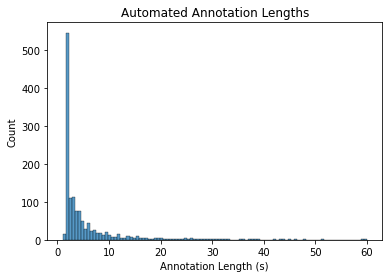

In [9]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

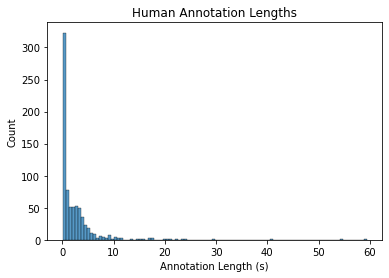

In [10]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [11]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./FIELDwav,20210810_202000.WAV,0,49.4567,0.1300,bird
1,./FIELDwav,20210811_080000.WAV,0,0.3191,4.6492,bird
2,./FIELDwav,20210811_181000.WAV,0,2.3400,0.5900,bird
3,./FIELDwav,20210811_181000.WAV,0,6.0000,0.4500,bird
4,./FIELDwav,20210812_073000.WAV,0,58.4300,1.5600,bird
...,...,...,...,...,...,...
755,./FIELDwav,20210823_092000.WAV,0,49.7109,5.1091,bird
756,./FIELDwav,20210824_034000.WAV,0,50.0408,4.8592,bird
757,./FIELDwav,20210824_170000.WAV,0,4.9283,2.3996,bird
758,./FIELDwav,20210824_170000.WAV,0,7.3279,3.8794,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


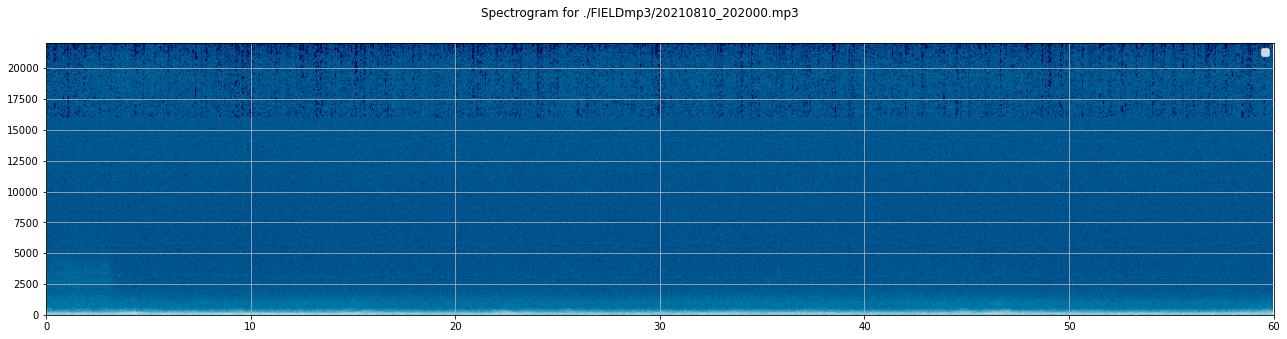

In [25]:
clip_path = "./FIELDmp3/20210810_202000.mp3"
spectrogram_visualization(clip_path)

### Baseline graph with log scale

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -870.1402  -1586.4773  -1581.7903  ...   276.52115   300.84366
   247.30107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


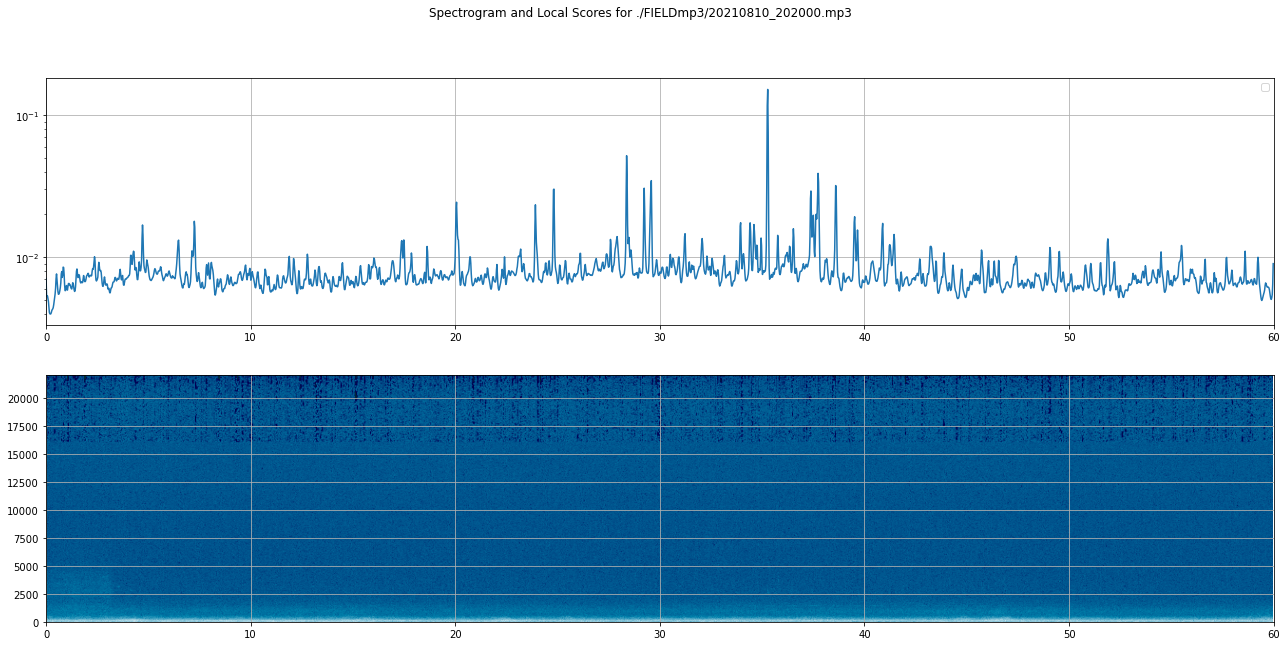

In [26]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -870.1402  -1586.4773  -1581.7903  ...   276.52115   300.84366
   247.30107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


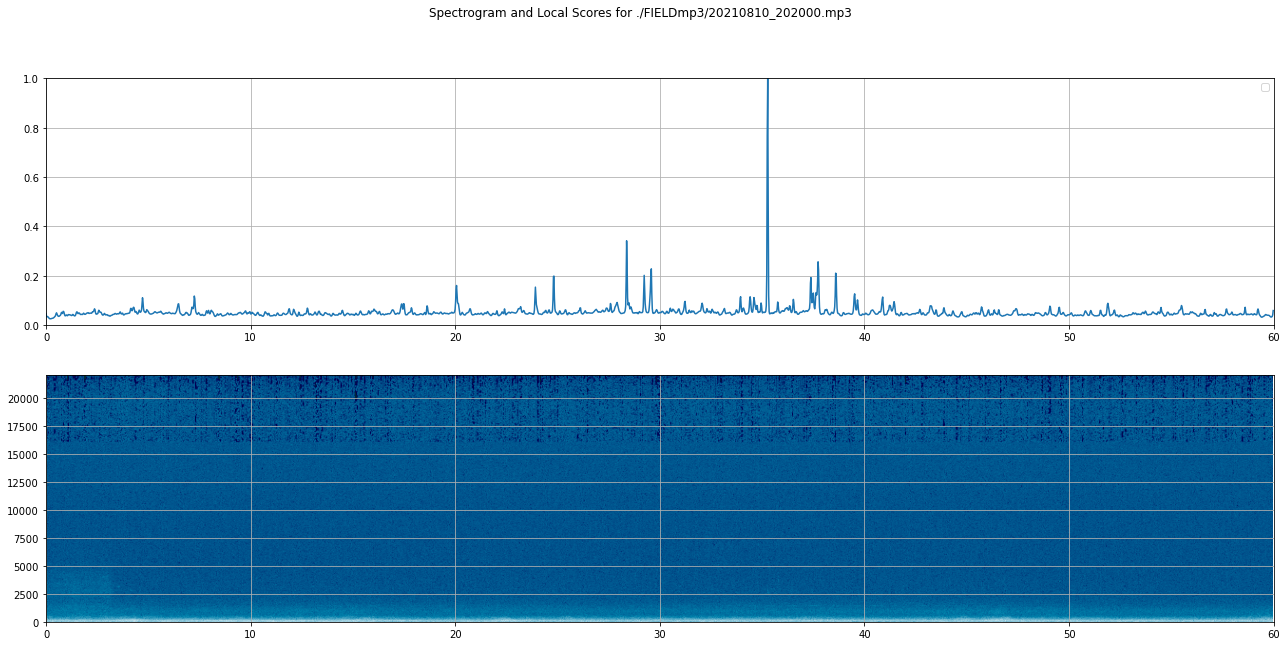

In [27]:
spectrogram_visualization(clip_path, isolation_parameters = isolation_parameters, normalize_local_scores = True)

### Graph with Automated Labeling 

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -870.1402  -1586.4773  -1581.7903  ...   276.52115   300.84366
   247.30107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(


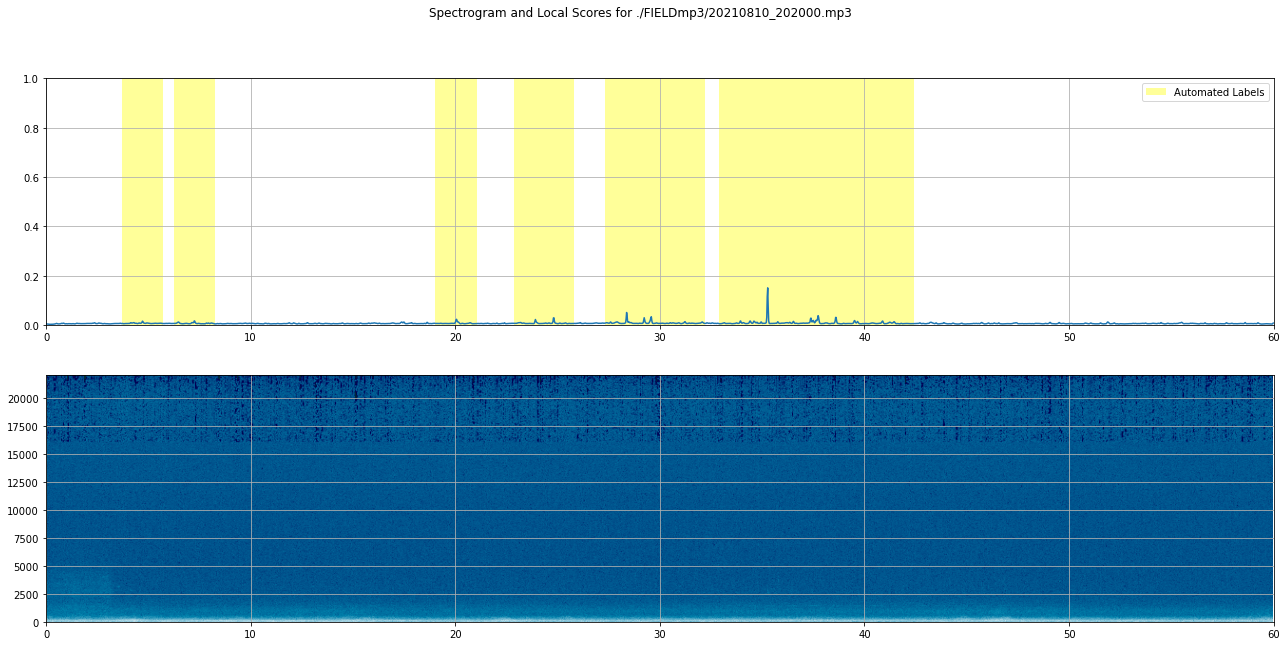

In [28]:
spectrogram_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


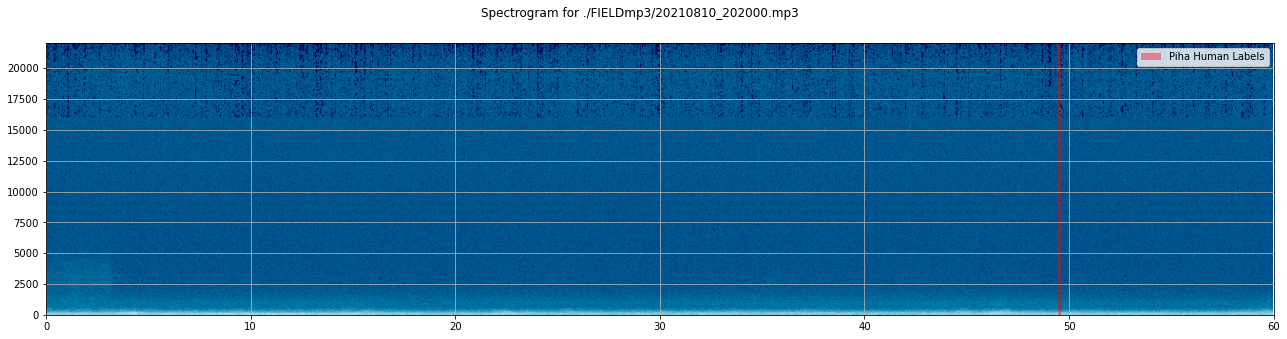

In [29]:
spectrogram_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "20210810_202000.WAV"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

/Users/pranjalchatterjee/anaconda3/envs/species-id/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/microfaune_package/microfaune/audio.py:126: FutureWarning: Pass y=[ -870.1402  -1586.4773  -1581.7903  ...   276.52115   300.84366
   247.30107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(


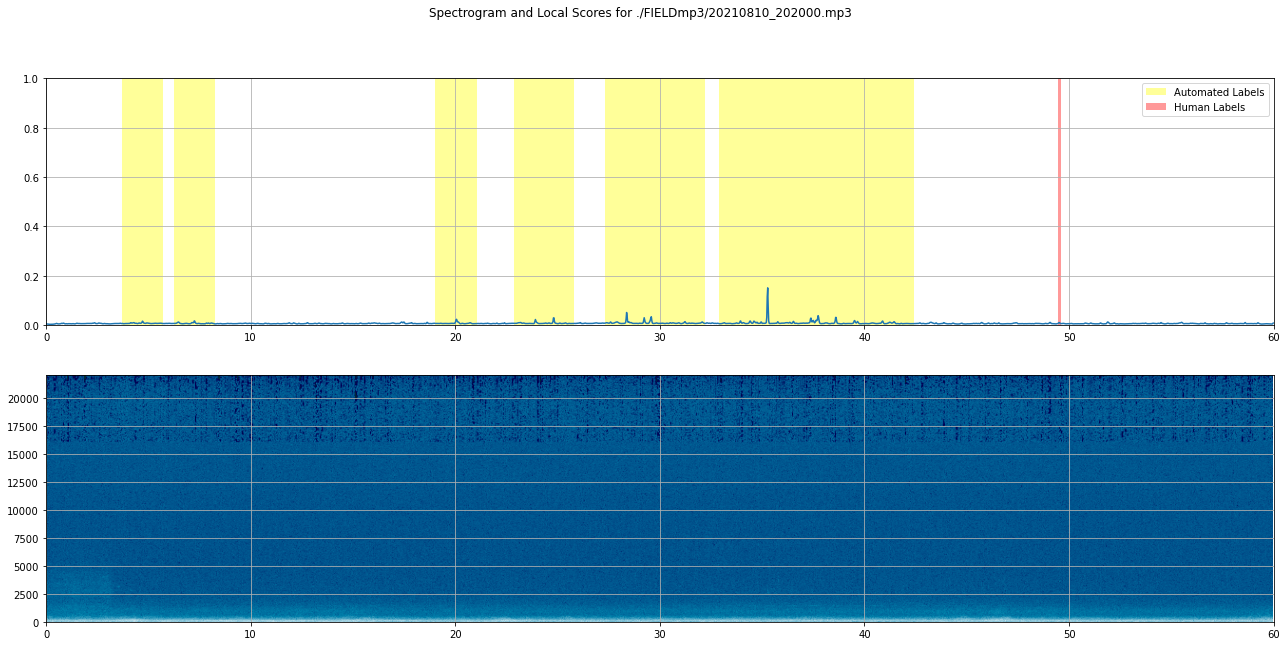

In [30]:
spectrogram_visualization(clip_path,automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "20210810_202000.WAV"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

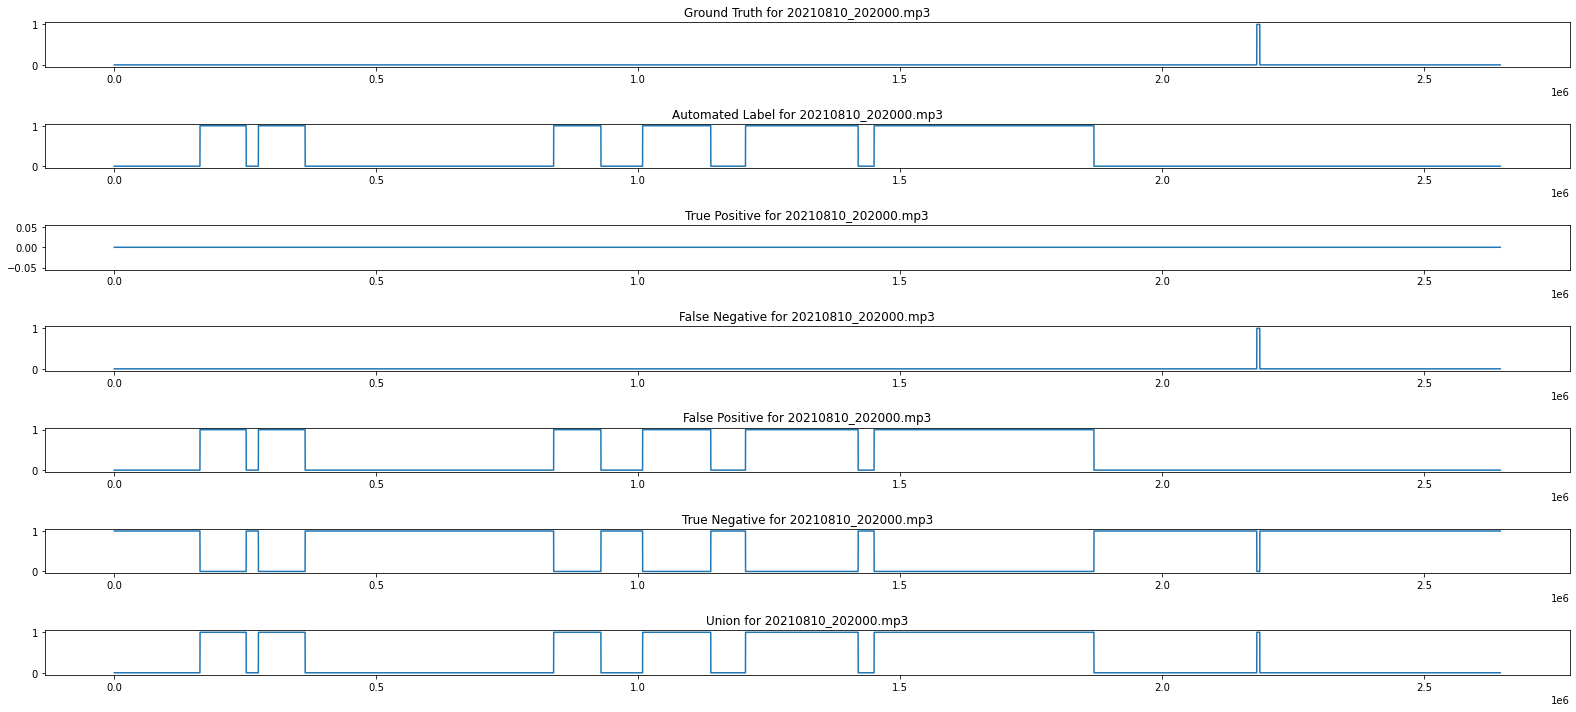

In [31]:
automated_piha_df = automated_df[automated_df["IN FILE"].str[:-4] == "20210810_202000"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "20210810_202000.WAV"]
piha_stats = binary_visualization(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [19]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Error calculating statistics, likely due
        to zero division, setting values to zero
Error calculating statistics, likely due
        to zero division, setting values to zero


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:213: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./FIELDmp3/,20210816_054000.mp3,bird,1.590385,36.177982,0.759206,21.472426,38.527574,0.042109,0.676877,0.079285,0.041279
1,./FIELDmp3/,20210824_144000.mp3,bird,1.399819,12.497324,0.000000,46.102857,13.897143,0.100727,1.000000,0.183019,0.100727
2,./FIELDmp3/,20210812_063000.mp3,bird,0.000000,7.850748,2.959501,49.189751,10.810249,0.000000,0.000000,0.000000,0.000000
3,./FIELDmp3/,20210820_102000.mp3,bird,0.000000,46.723810,0.830023,12.446168,47.553832,0.000000,0.000000,0.000000,0.000000
4,./FIELDmp3/,20210810_233000.mp3,bird,0.000000,10.647007,3.499501,45.853492,14.146508,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
222,./FIELDmp3/,20210818_025000.mp3,bird,2.618730,42.902562,0.780658,13.698050,46.301950,0.057528,0.770353,0.107060,0.056558
223,./FIELDmp3/,20210819_102000.mp3,bird,2.099705,32.821723,0.000000,25.078571,34.921429,0.060127,1.000000,0.113433,0.060127
224,./FIELDmp3/,20210817_131000.mp3,bird,16.687279,24.675442,0.000000,18.637279,41.362721,0.403438,1.000000,0.574928,0.403438
225,./FIELDmp3/,20210810_200000.mp3,bird,1.196145,39.715215,1.183447,17.905193,42.094807,0.029237,0.502668,0.055261,0.028416


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [20]:
global_dataset_statistics(statistics_df)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.188062,0.777637,0.302877,0.178465


### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [21]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0. 0. 0. 0. 0. 0.]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [22]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

Division by zero setting precision, recall, and f1 to zero on 20210810_202000.WAV


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./FIELDwav/,20210810_202000.WAV,bird,0,1,6,0,0,0


### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [23]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Division by zero setting precision, recall, and f1 to zero on 20210816_054000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210824_144000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_063000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210820_102000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210810_233000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_195000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210811_095000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_155000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210814_220000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210824_160000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210820_045000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_151000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210820_192000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210815_175000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_031000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210815_004000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_123000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_203000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_164000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210820_213000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210822_120000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210822_165000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210822_122000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_005000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_181000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_205000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_224000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_115000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210816_093000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_074000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_230000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_053000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210813_125000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_010000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210820_012000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210816_072000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_041000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210824_170000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_013000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210823_101000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_201000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_003000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_173000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210820_094000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210811_044000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_184000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_102000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210815_161000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210817_051000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_130000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_015000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_193000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210811_093000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_083000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_234000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210813_105000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_234000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210817_143000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_034000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210811_181000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210813_033000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210818_002000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_123000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_143000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210816_105000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210816_005000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_193000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210814_224000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_193000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_032000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_060000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_082000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210810_225000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_033000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210824_152000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_050000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_190000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_060000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_060000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210813_085000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_155000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_072000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_111000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_070000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_063000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210814_144000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_214000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210811_025000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210815_000000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210815_100000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210817_221000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210818_235000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_112000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210815_112000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210813_225000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_202000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_210000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210820_093000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_053000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210816_203000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_211000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210818_095000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_221000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_112000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210813_102000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210814_084000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_184000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210815_214000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210824_034000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210817_072000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_022000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210817_111000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_001000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210821_024000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210817_025000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210818_023000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210824_071000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210818_123000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210824_012000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_223000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_085000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210816_134000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_111000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210815_040000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210813_082000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210822_052000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210822_064000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210820_083000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210820_234000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_220000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_043000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210814_043000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_081000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210819_215000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210811_053000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210816_030000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_115000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210813_032000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_213000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210816_022000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_122000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210822_181000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_041000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210810_202000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210819_063000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_144000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_090000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210814_182000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210821_205000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_012000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210811_173000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_090000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210823_000000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210811_024000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210820_185000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_195000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_095000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210811_163000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210821_231000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210819_192000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210815_054000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_005000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210812_105000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210814_213000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210813_041000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_113000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_134000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_062000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat

Division by zero setting precision, recall, and f1 to zero on 20210821_032000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210824_153000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210810_193000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210819_110000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210817_052000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210819_061000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210823_092000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210818_025000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210819_102000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210817_131000.WAV
Division by zero setting precision, recall, and f1 to zero on 20210810_200000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)
/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


Division by zero setting precision, recall, and f1 to zero on 20210812_050000.WAV


/Users/pranjalchatterjee/Documents/Internship/PyHa/PyHa/statistics.py:221: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(clip_stats_df)


,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,./FIELDwav/,20210816_054000.WAV,bird,0,1,8,0.0,0.0,0.0
1,./FIELDwav/,20210824_144000.WAV,bird,0,2,5,0.0,0.0,0.0
2,./FIELDwav/,20210812_063000.WAV,bird,0,1,2,0.0,0.0,0.0
3,./FIELDwav/,20210820_102000.WAV,bird,0,1,6,0.0,0.0,0.0
4,./FIELDwav/,20210810_233000.WAV,bird,0,1,5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
222,./FIELDwav/,20210818_025000.WAV,bird,0,1,9,0.0,0.0,0.0
223,./FIELDwav/,20210819_102000.WAV,bird,0,1,7,0.0,0.0,0.0
224,./FIELDwav/,20210817_131000.WAV,bird,0,4,5,0.0,0.0,0.0
225,./FIELDwav/,20210810_200000.WAV,bird,0,1,8,0.0,0.0,0.0


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [24]:
global_stats_df = global_statistics(stats_df)
global_stats_df

,MANUAL ID,TRUE POSITIVE,FALSE NEGATIVE,FALSE POSITIVE,PRECISION,RECALL,F1
0,N/A,67,693,1294,0.0492,0.0882,0.0632
